In [1]:
# https://www.kaggle.com/krishnasrujan/automobile-dataset-price-prediction

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('automobile_data.csv',na_values=['?'])
data

symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
0            130        mpfi  3.47    2.68                9.0       111.0   
1            130        mpfi  3.47    2.68                9.0       111.0   
2            152        mpfi  2.68    3.47                9.0       154.0   
3            109        mpfi  3.19    3.40               10.0       102.0   
4            136        mpfi  3.19    3.40                8.0       115.0   
..           ...         ...   ...     ...                ...         ...   
200          141        mpfi  3.78    3.15                9.5       114.0   
201          141        mpfi  3.78    3.15                8.7       160.0   
202          173        mpfi  3.58    2.87                8.8       134.0   
203          145         idi  3.01    3.40               23.0       106.0   
204          141        mpfi  3.78    3.15                9.5       114.0   

     peak-rpm  city-mpg  highway-mpg    price  
0      5000.0        21           27  13495.0  
1      5000.0        21           27  16500.0  
2      5000.0        19           26  16500.0  
3      5500.0        24           30  13950.0  
4      5500.0        18           22  17450.0  
..        ...       ...          ...      ...  
200    5400.0        23           28  16845.0  
201    5300.0        19           25  19045.0  
202    5500.0        18           23  214

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
nulls = data.columns[data.isnull().all()]
nulls
# data.isna().sum()

Index([], dtype='object')

In [8]:
(data == data.iloc[0]).all()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [9]:
# categorical features
cat_features = [feat for feat in data.columns if data[feat].dtype == 'object']
cat_features

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [10]:
#discrete features
discrete_features = [feat for feat in data.columns if len(data[feat].unique())<10 and feat not in cat_features]
discrete_features

['symboling']

In [13]:
#continuous features
con_features = [feat for feat in data.columns if feat not in discrete_features and feat not in cat_features]
con_features

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [14]:
#filling categorical features with first most frequently occuring value
for feat in cat_features:
    data[feat].fillna(data[feat].mode()[0],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

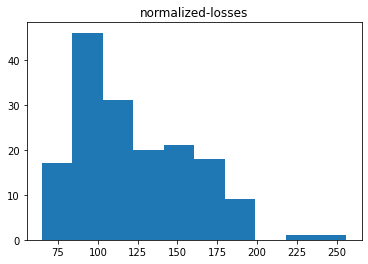

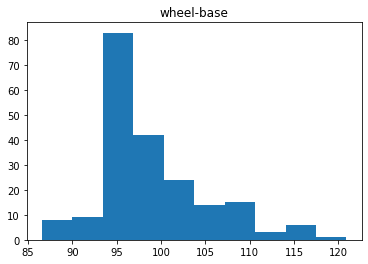

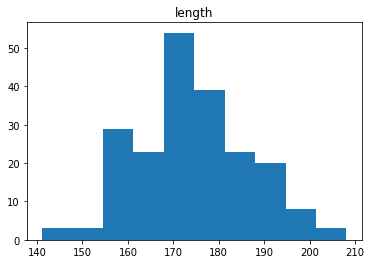

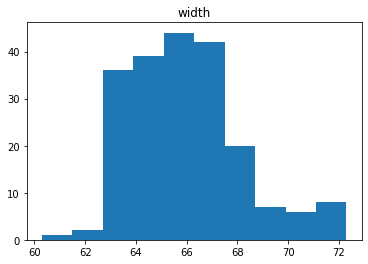

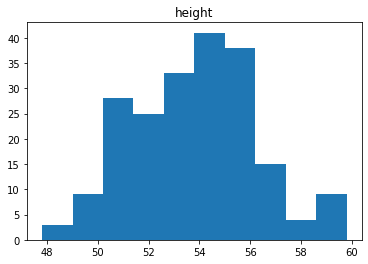

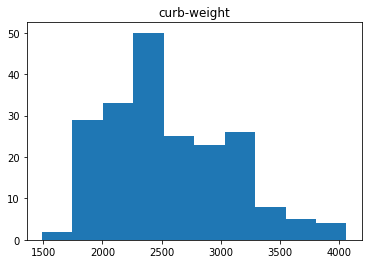

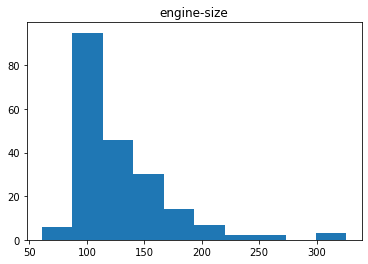

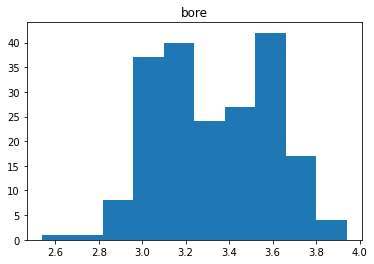

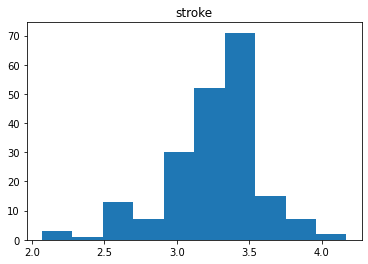

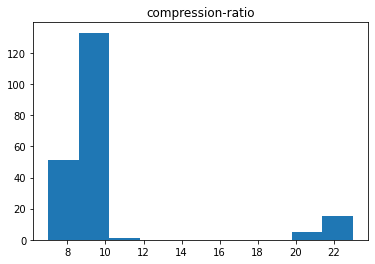

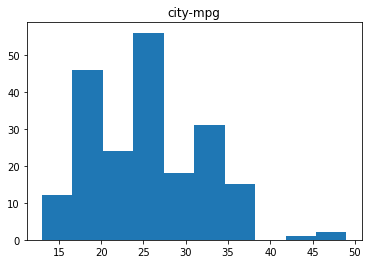

In [15]:
for feat in con_features:
    plt.hist(data[feat])
    plt.title(feat)
    plt.show()

In [16]:
#filling continuous features with mean the the column 
for feat in con_features:
    data[feat].fillna(data[feat].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [17]:
for feat in cat_features:
    print(feat,'\n',data[feat].unique(),'\n')

make 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 

fuel-type 
 ['gas' 'diesel'] 

aspiration 
 ['std' 'turbo'] 

num-of-doors 
 ['two' 'four'] 

body-style 
 ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drive-wheels 
 ['rwd' 'fwd' '4wd'] 

engine-location 
 ['front' 'rear'] 

engine-type 
 ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 

num-of-cylinders 
 ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 

fuel-system 
 ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 



In [18]:
data['make'] = data['make'].map(data['make'].value_counts().to_dict())
data['fuel-system'] = data['fuel-system'].map(data['fuel-system'].value_counts().to_dict())
data.head()

symboling  normalized-losses  make fuel-type aspiration num-of-doors  \
0          3              122.0     3       gas        std          two   
1          3              122.0     3       gas        std          two   
2          1              122.0     3       gas        std          two   
3          2              164.0     7       gas        std         four   
4          2              164.0     7       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size  fuel-system  \
0    48.8         2548        dohc             four          130           94   
1    48.8         2548        dohc             four          130           94   
2    52.4         2823        ohcv              six          152           94   
3    54.3         2337         ohc             four          109           94   
4    54.3         2824         ohc             five          136           94   

   bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0  3.47    2.68                9.0       111.0    5000.0        21   
1  3.47    2.68                9.0       111.0    5000.0        21   
2  2.68    3.47                9.0       154.0    5000.0        19   
3  3.19    3.40               10.0       102.0    5500.0        24   
4  3.19    3.40                8.0       115.0    5500.0        18   

   highway-mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0

In [19]:
label = LabelEncoder()
data[['num-of-doors','num-of-cylinders']] = data[['num-of-doors','num-of-cylinders']].apply(label.fit_transform)
data

symboling  normalized-losses  make fuel-type aspiration  num-of-doors  \
0            3              122.0     3       gas        std             1   
1            3              122.0     3       gas        std             1   
2            1              122.0     3       gas        std             1   
3            2              164.0     7       gas        std             0   
4            2              164.0     7       gas        std             0   
..         ...                ...   ...       ...        ...           ...   
200         -1               95.0    11       gas        std             0   
201         -1               95.0    11       gas      turbo             0   
202         -1               95.0    11       gas        std             0   
203         -1               95.0    11    diesel      turbo             0   
204         -1               95.0    11       gas      turbo             0   

      body-style drive-wheels engine-location  wheel-base  length  width  \
0    convertible          rwd           front        88.6   168.8   64.1   
1    convertible          rwd           front        88.6   168.8   64.1   
2      hatchback          rwd           front        94.5   171.2   65.5   
3          sedan          fwd           front        99.8   176.6   66.2   
4          sedan          4wd           front        99.4   176.6   66.4   
..           ...          ...             ...         ...     ...    ...   
200        sedan          rwd           front       109.1   188.8   68.9   
201        sedan          rwd           front       109.1   188.8   68.8   
202        sedan          rwd           front       109.1   188.8   68.9   
203        sedan          rwd           front       109.1   188.8   68.9   
204        sedan          rwd           front       109.1   188.8   68.9   

     height  curb-weight engine-type  num-of-cylinders  engine-size  \
0      48.8         2548        dohc                 2          130   
1      48.8         2548        dohc                 2          130   
2      52.4         2823        ohcv                 3          152   
3      54.3         2337         ohc                 2          109   
4      54.3         2824         ohc                 1          136   
..      ...          ...         ...               ...          ...   
200    55.5         2952         ohc                 2          141   
201    55.5         3049         ohc                 2          141   
202    55.5         3012        ohcv                 3          173   
203    55.5         3217         ohc                 3          145   
204    55.5         3062         ohc                 2          141   

     fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0             94  3.47    2.68                9.0       111.0    5000.0   
1             94  3.47    2.68                9.0       111.0    5000.0   
2             94  2.68    3.47                9.0       154.0    5000.0   
3             94  3.19    3.40               10.0       102.0    5500.0   
4             94  3.19    3.40                8.0       115.0    5500.0   
..           ...   ...     ...                ...         ...       ...   
200           94  3.78    3.15                9.5       114.0    5400.0   
201           94  3.78    3.15                8.7       160.0    5300.0   
202           94  3.58    2.87                8.8       134.0    5500.0   
203           20  3.01    3.40               23.0       106.0    4800.0   
204           94  3.78    3.15                9.5       114.0    5400.0   

     city-mpg  highway-mpg    price  
0          21           27  13495.0  
1          21           27  16500.0  
2          19           26  16500.0  
3          24           30  13950.0  
4          18           22  17450.0  
..        ...          ...      ...  
200        23           28  16845.0  
201        19           25  19045.0  
202        18           23  21485.0  
203        26        

In [20]:
data = pd.get_dummies(data,drop_first=True)
data

symboling  normalized-losses  make  num-of-doors  wheel-base  length  \
0            3              122.0     3             1        88.6   168.8   
1            3              122.0     3             1        88.6   168.8   
2            1              122.0     3             1        94.5   171.2   
3            2              164.0     7             0        99.8   176.6   
4            2              164.0     7             0        99.4   176.6   
..         ...                ...   ...           ...         ...     ...   
200         -1               95.0    11             0       109.1   188.8   
201         -1               95.0    11             0       109.1   188.8   
202         -1               95.0    11             0       109.1   188.8   
203         -1               95.0    11             0       109.1   188.8   
204         -1               95.0    11             0       109.1   188.8   

     width  height  curb-weight  num-of-cylinders  engine-size  fuel-system  \
0     64.1    48.8         2548                 2          130           94   
1     64.1    48.8         2548                 2          130           94   
2     65.5    52.4         2823                 3          152           94   
3     66.2    54.3         2337                 2          109           94   
4     66.4    54.3         2824                 1          136           94   
..     ...     ...          ...               ...          ...          ...   
200   68.9    55.5         2952                 2          141           94   
201   68.8    55.5         3049                 2          141           94   
202   68.9    55.5         3012                 3          173           94   
203   68.9    55.5         3217                 3          145           20   
204   68.9    55.5         3062                 2          141           94   

     bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0    3.47    2.68                9.0       111.0    5000.0        21   
1    3.47    2.68                9.0       111.0    5000.0        21   
2    2.68    3.47                9.0       154.0    5000.0        19   
3    3.19    3.40               10.0       102.0    5500.0        24   
4    3.19    3.40                8.0       115.0    5500.0        18   
..    ...     ...                ...         ...       ...       ...   
200  3.78    3.15                9.5       114.0    5400.0        23   
201  3.78    3.15                8.7       160.0    5300.0        19   
202  3.58    2.87                8.8       134.0    5500.0        18   
203  3.01    3.40               23.0       106.0    4800.0        26   
204  3.78    3.15                9.5       114.0    5400.0        19   

     highway-mpg    price  fuel-type_gas  aspiration_turbo  \
0             27  13495.0              1                 0   
1             27  16500.0              1                 0   
2             26  16500.0              1                 0   
3             30  13950.0              1                 0   
4             22  17450.0              1                 0   
..           ...      ...            ...               ...   
200           28  16845.0              1                 0   
201           25  19045.0              1                 1   
202           23  21485.0              1                 0   
203           27  22470.0              0                 1   
204           25  22625.0              1                 1   

     body-style_hardtop  body-style_hatchback  body-style_sedan  \
0                     0                     0                 0   
1                     0                     0                 0   
2                     0                     1                 0   
3                     0                     0                 1   
4                     0                     0                 1   
..                  ...                   ...               ...   
200                   0                     0       

In [21]:
# changing the distributon of continuous features to log normal distribution
for feat in con_features:
    data[feat] = np.log(data[feat]+1)

<AxesSubplot:>

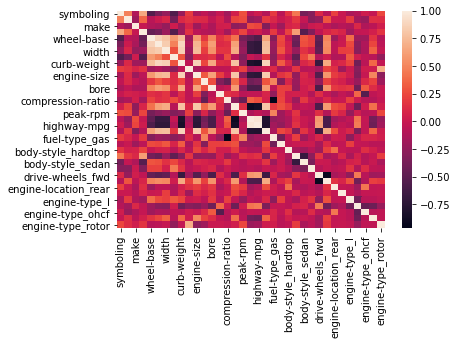

In [22]:
sns.heatmap(data.corr())


In [23]:
label = data['price']
data.drop('price',inplace=True,axis=1)
colnames=data.columns

In [24]:
scaler=StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=0.2)

In [26]:
clf=svm.SVR()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print('svm', acc)

clf=LinearRegression()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print('linear regression', acc)

clf=Ridge()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print('ridge regression', acc)

svm 0.8439357735776174
linear regression 0.8780473043339265
ridge regression 0.8827550645496288


In [27]:
X_train = pd.DataFrame(X_train)
X_train.columns = colnames
X_test = pd.DataFrame(X_test)
X_test.columns = colnames

In [28]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.006, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.006, random_state=0))

In [29]:
feature_sel_model.get_support()


array([ True,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [30]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[feature_sel_model.get_support()]

X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [31]:
print(X_train.shape)
X_train.head()

(164, 24)


symboling  normalized-losses      make  wheel-base     width  curb-weight  \
0   1.743470           0.126163 -1.300450   -1.801353 -0.851698     0.085230   
1   0.133509          -1.205229  2.052184   -0.500876 -1.095919    -1.179125   
2  -1.476452          -2.349085  2.052184    0.641574  0.295042    -0.376387   
3  -0.671472           1.221232 -0.375585    1.525380  1.174323     1.234313   
4  -1.476452          -0.942972 -0.722409    2.690471  2.645780     2.069258   

   engine-size  fuel-system      bore    stroke  compression-ratio  \
0     0.237430     0.856665  0.540595 -1.866374          -0.253368   
1    -0.985515    -0.043108 -1.036048 -0.675985          -0.253368   
2     0.012497     0.856665 -0.041837  0.885289          -0.369918   
3     0.791580    -1.521305  1.342312  0.827442           2.763600   
4     1.450167    -1.521305  0.929046  1.170753           2.849591   

   horsepower  body-style_hardtop  body-style_hatchback  body-style_wagon  \
0    0.361199           -0.201517             -0.720082         -0.372678   
1   -1.327848           -0.201517              1.388730         -0.372678   
2   -0.184530           -0.201517             -0.720082         -0.372678   
3   -0.091328           -0.201517             -0.720082         -0.372678   
4    0.659994           -0.201517             -0.720082         -0.372678   

   drive-wheels_fwd  drive-wheels_rwd  engine-location_rear  \
0         -1.188177          1.302831             -0.121867   
1          0.841625         -0.767559             -0.121867   
2          0.841625         -0.767559             -0.121867   
3         -1.188177          1.302831             -0.121867   
4         -1.188177          1.302831             -0.121867   

   engine-type_dohcv  engine-type_l  engine-type_ohc  engine-type_ohcf  \
0          -0.070014      -0.249351        -1.611363         -0.280976   
1          -0.070014      -0.249351         0.620593         -0.280976   
2          -0.070014      -0.249351         0.620593         -0.280976   
3          -0.070014       4.010403        -1.611363         -0.280976   
4          -0.070014      -0.249351         0.620593         -0.280976   

   engine-type_ohcv  engine-type_rotor  
0         -0.260208          -0.141069  
1         -0.260208          -0.141069  
2         -0.260208          -0.141069  
3         -0.260208          -0.141069  
4         -0.260208          -0.141069

In [32]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [33]:
clf=svm.SVR()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print(acc)

0.8744294197795467


In [34]:
clf=LinearRegression()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print(acc)

0.8680059000923233


In [35]:
clf=Ridge()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print(acc)

0.8743439076466752
